In [1]:
import pandas as pd
import datetime

interest_rates = pd.read_csv('Interest_rates.csv')
interest_rates['date'] = pd.to_datetime(interest_rates['date'], dayfirst=True)
interest_rates = interest_rates[interest_rates['date'] >= datetime.datetime(2021, 1, 1)]

In [2]:
dates = interest_rates.reset_index()['date'].tolist()
rates = interest_rates['interest_rate'].tolist()

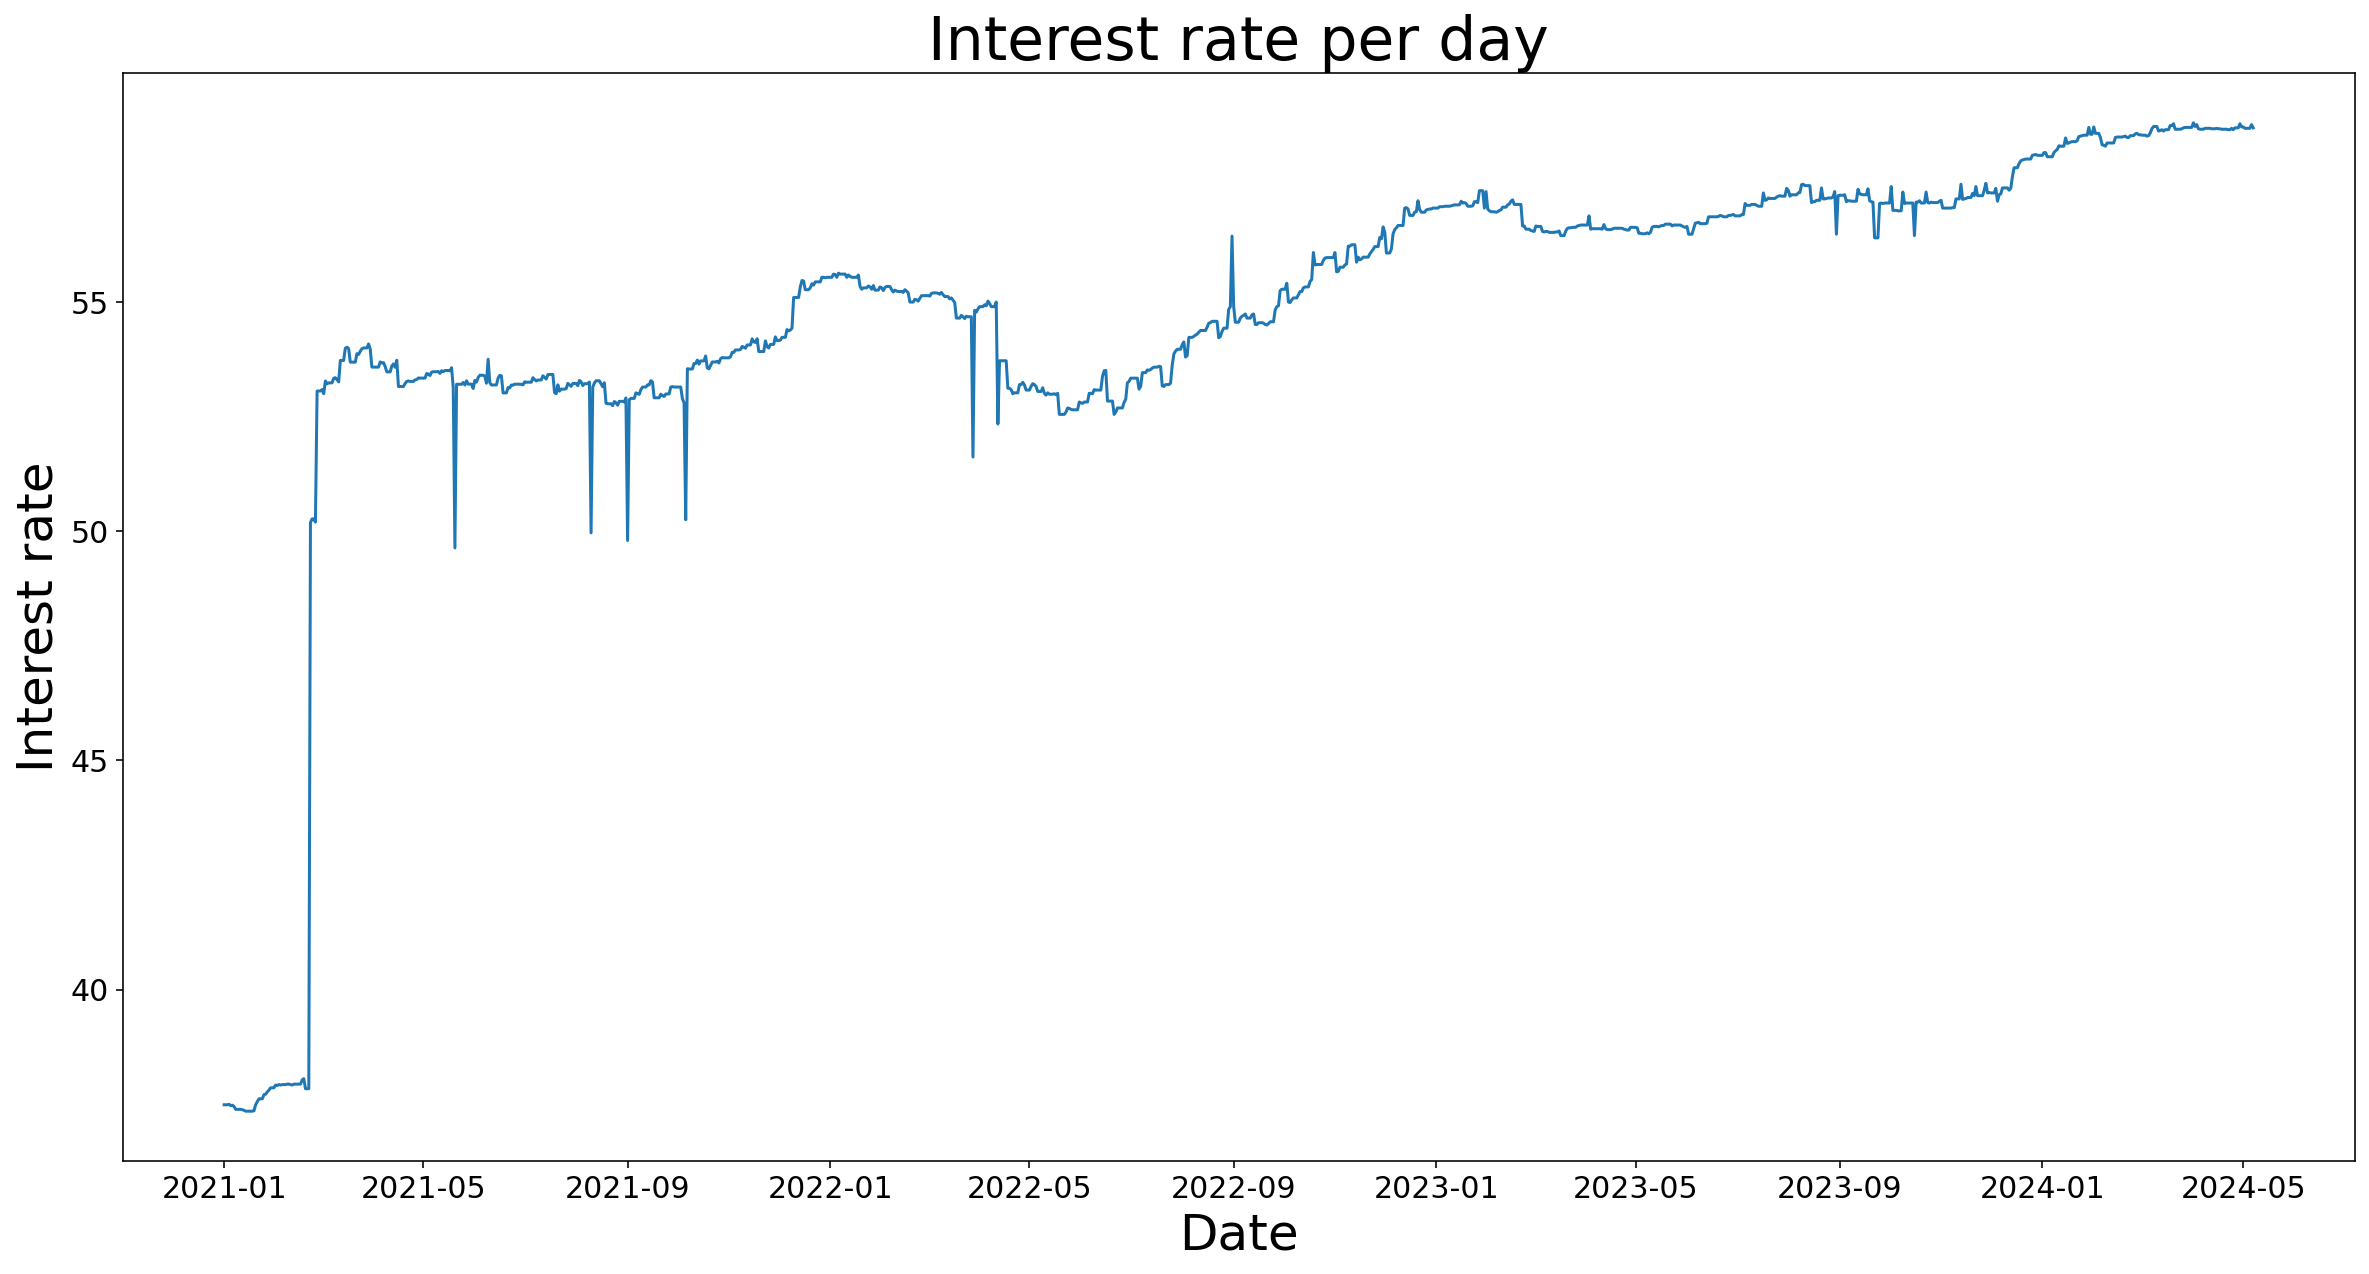

In [3]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 20, 10

plt.plot(dates, rates)
plt.xlabel('Date', fontsize = 25)
plt.ylabel('Interest rate', fontsize = 25)
plt.title('Interest rate per day', fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

period = 128
train, test = train_test_split(rates, test_size=period, shuffle=False)
train_dates, test_dates = train_test_split(dates, test_size=period, shuffle=False)
train, val = train_test_split(train, test_size=period, shuffle=False)
train_dates, val_dates = train_test_split(train_dates, test_size=period, shuffle=False)

In [5]:
CIR_white = pd.read_excel('CIR.xlsx', 'CIR_white')
CIR_blue = pd.read_excel('CIR.xlsx', 'CIR_blue')

#### White noise ####

In [6]:
from sklearn.metrics import mean_squared_error

test_white_pred = CIR_white['interest_rate'][-period:].values
test_RMSE = mean_squared_error(test, test_white_pred, squared=False)
test_rel_error = ((abs(test - test_white_pred)) / test) * 100
print("Test RMSE = %.3f" % test_RMSE, sep="")
print("Test relative error = %.3f" % test_rel_error.mean(), '%', sep="")
print("Last test relative error = %.3f" % test_rel_error[-1], '%', sep="")

Test RMSE = 3.001
Test relative error = 4.369%
Last test relative error = 1.034%


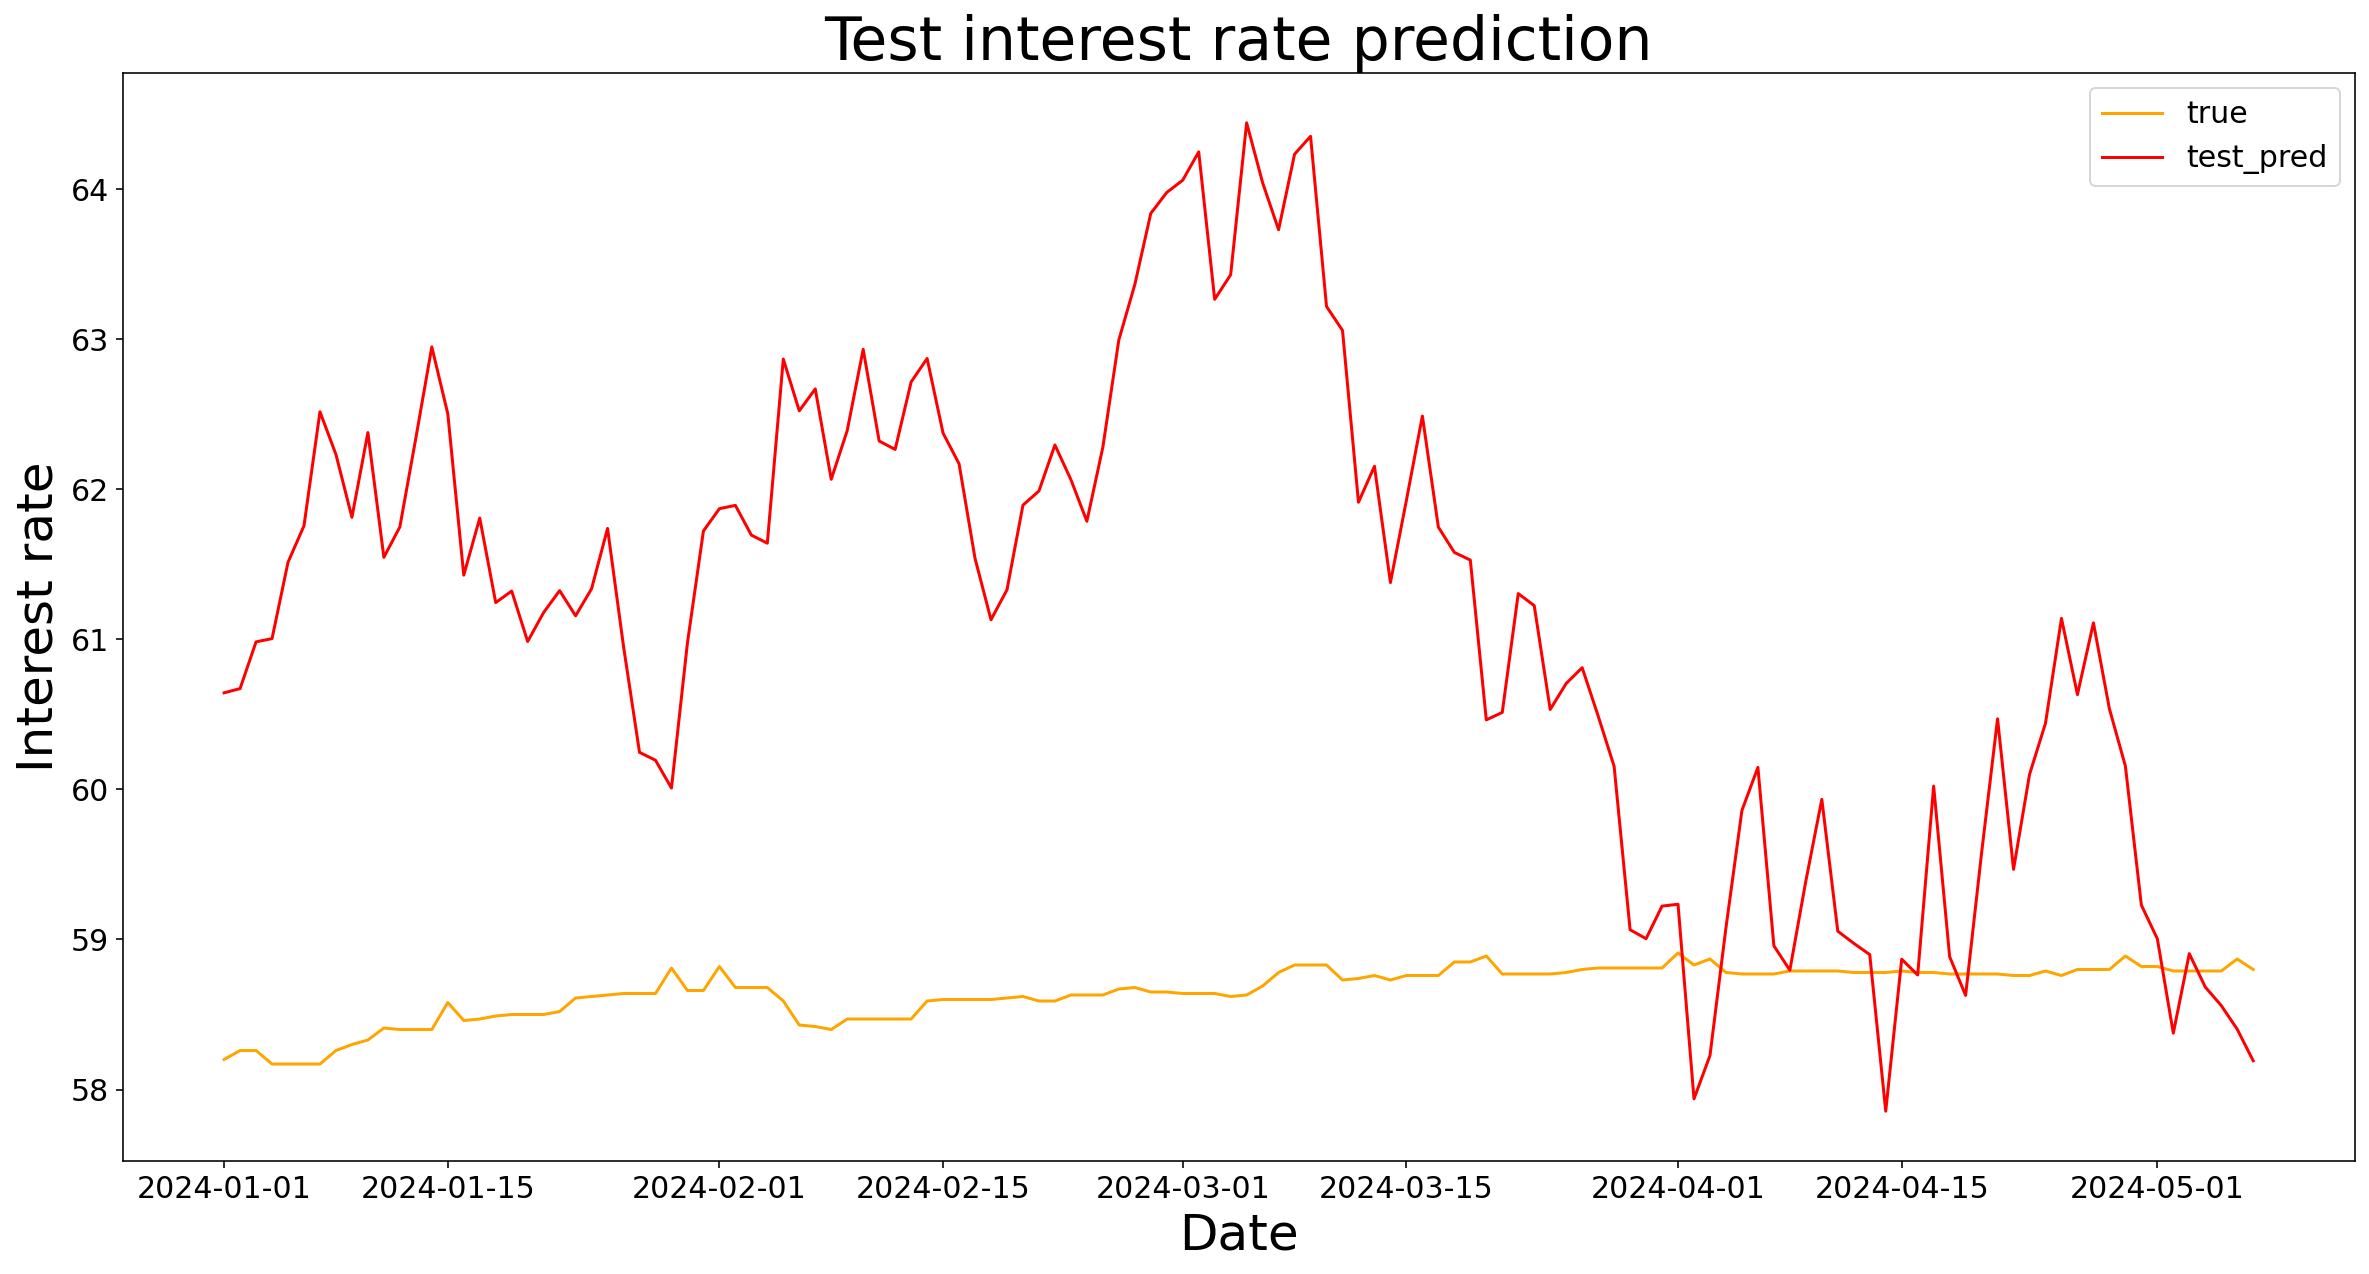

In [7]:
plt.plot(test_dates, test, color = 'orange', label = 'true')
plt.plot(test_dates, test_white_pred, color = 'red', label = 'test_pred')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Interest rate", fontsize = 25)
plt.title("Test interest rate prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

#### Blue noise ####

In [8]:
test_blue_pred = CIR_blue['interest_rate'][-period:].values
test_RMSE_ = mean_squared_error(test, test_blue_pred, squared=False)
test_rel_error_ = ((abs(test - test_blue_pred)) / test) * 100
print("Test RMSE = %.3f" % test_RMSE_, sep="")
print("Test relative error = %.3f" % test_rel_error_.mean(), '%', sep="")
print("Last test relative error = %.3f" % test_rel_error_[-1], '%', sep="")

Test RMSE = 2.796
Test relative error = 4.655%
Last test relative error = 6.046%


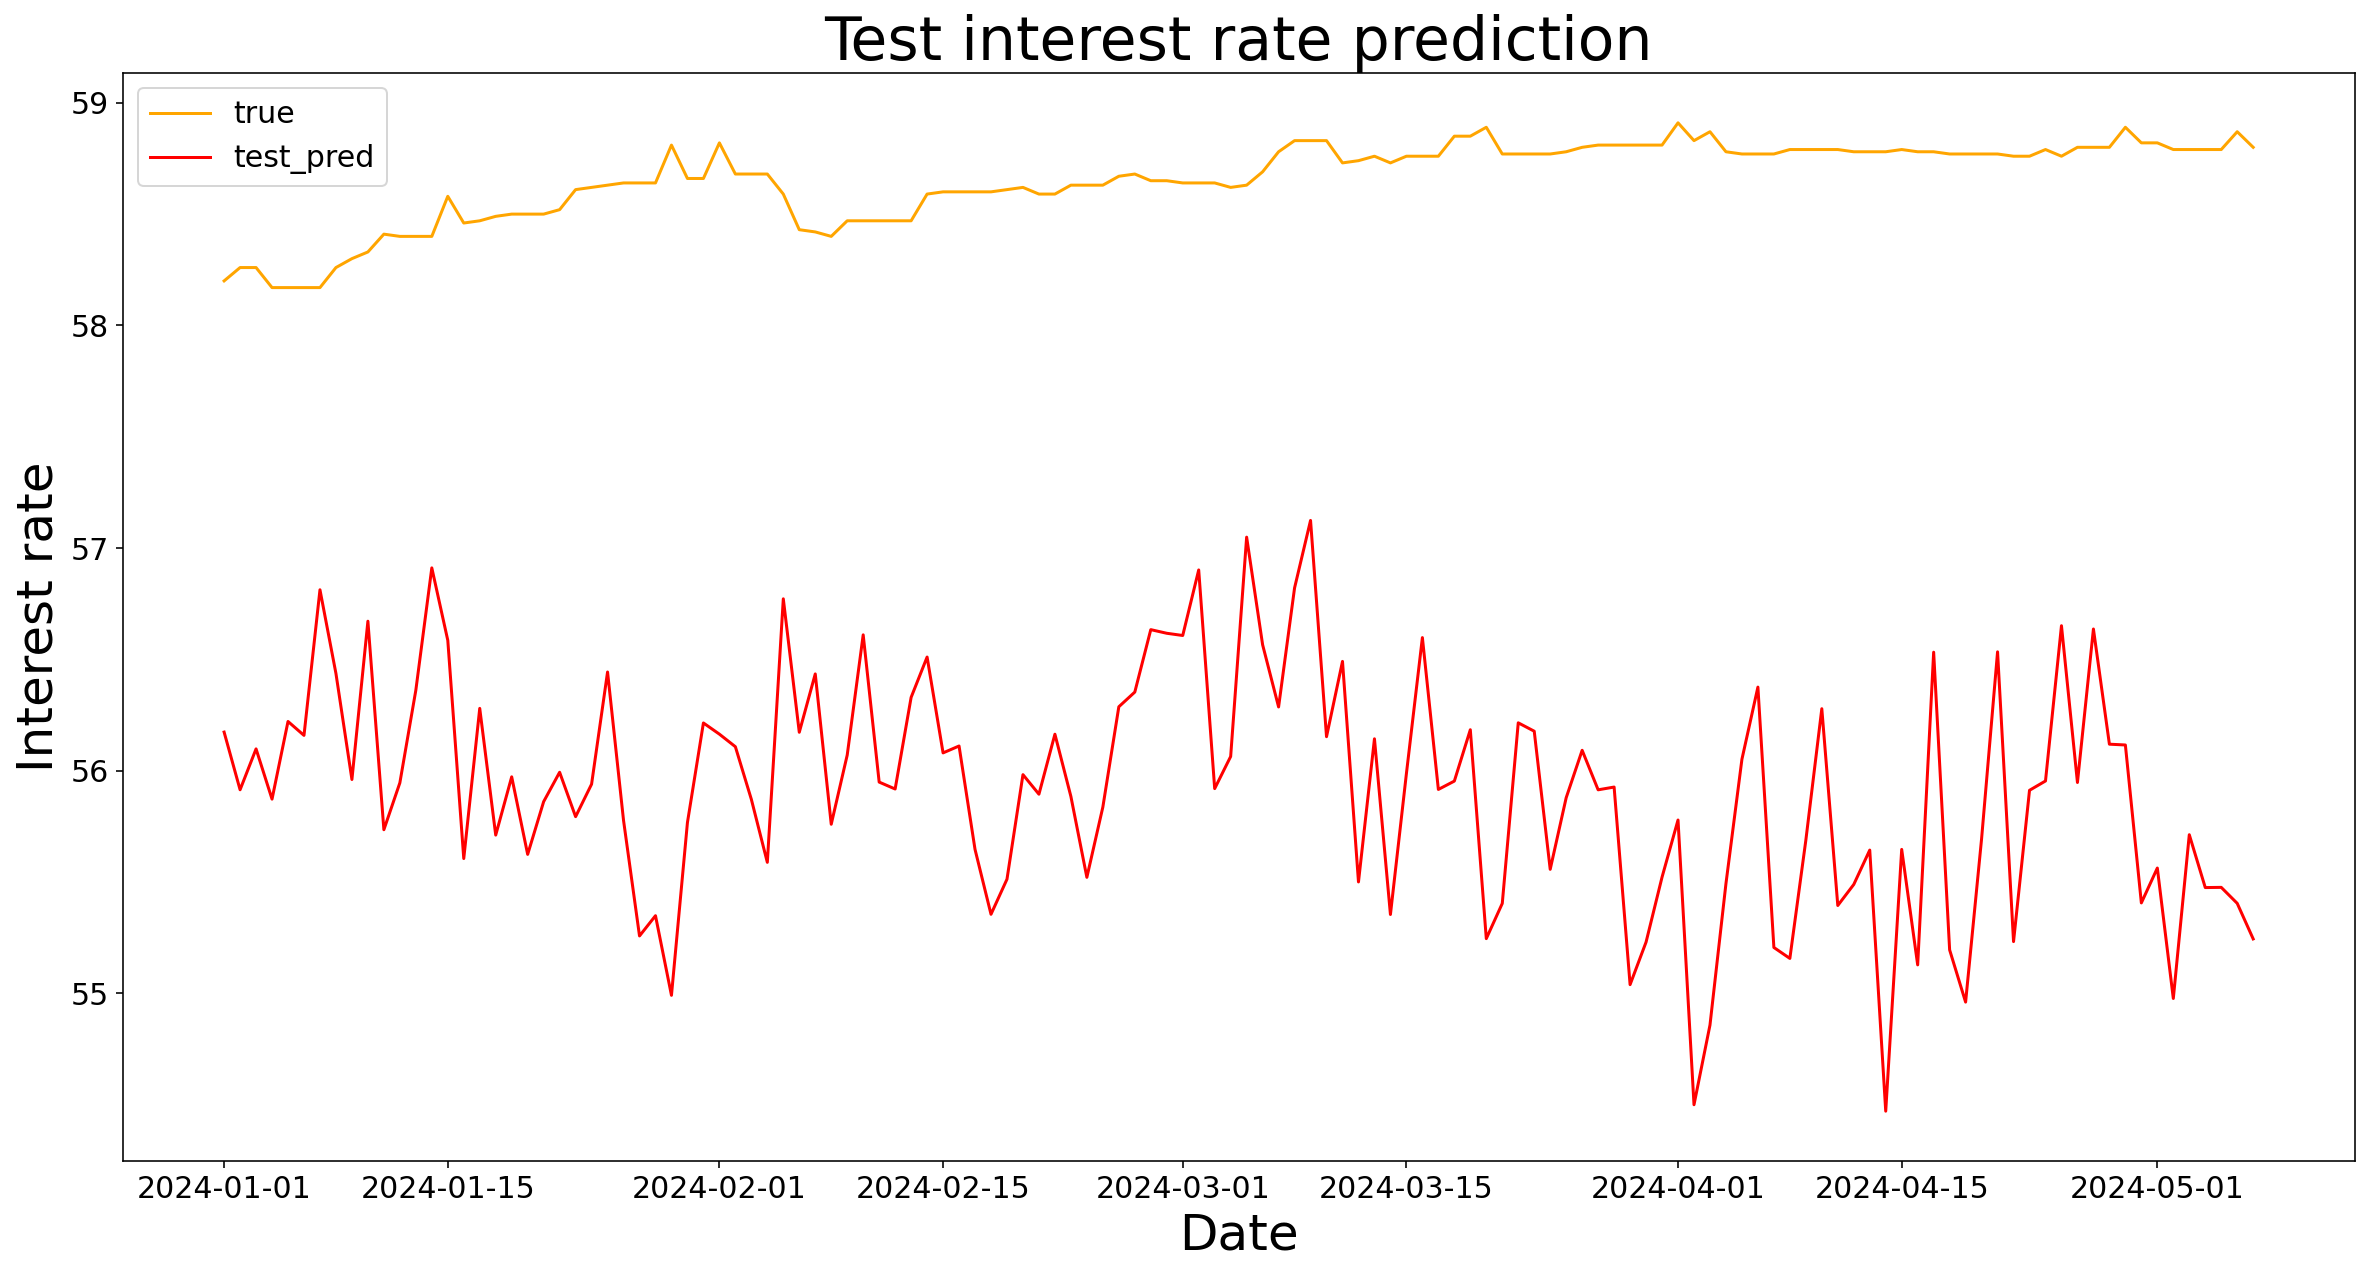

In [9]:
plt.plot(test_dates, test, color = 'orange', label = 'true')
plt.plot(test_dates, test_blue_pred, color = 'red', label = 'test_pred')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Interest rate", fontsize = 25)
plt.title("Test interest rate prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()